<a href="https://colab.research.google.com/github/osiris/test/blob/develop/ia-nlp-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 2: Vectorización y modelos clásicos

# 0 - Setup

In [ ]:
! pip install nltk scikit-learn gensim transformers wordcloud matplotlib pandas

Descarga de un dataset de detección de Spam

In [ ]:
! wget https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip
! unzip sms+spam+collection.zip

--2024-09-07 15:53:00--  https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘sms+spam+collection.zip’

sms+spam+collection     [ <=>                ] 198.65K  1017KB/s    in 0.2s    

2024-09-07 15:53:01 (1017 KB/s) - ‘sms+spam+collection.zip’ saved [203415]

Archive:  sms+spam+collection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


# 1 - SMS Spam Collection

El [SMS Spam Collection](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) es un dataset con mensajes de texto clasificados entre Spam y Ham (no spam).

Los datos tienen la siguiente forma:
```
ham   What you doing?how are you?
spam   FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
```

Almeida,Tiago and Hidalgo,Jos. (2012). SMS Spam Collection. UCI Machine Learning Repository. https://doi.org/10.24432/C5CC84.

Cargamos y visualizamos el dataset:

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
data = {
    "label": [],
    "raw_text": [],
    "length": []
}
with open("SMSSpamCollection") as fl:
  for line in fl:
    words = line.split()
    data['label'].append(words[0])
    data['raw_text'].append(' '.join(words[1:]))
    data['length'].append(len(words[1:]))

data = pd.DataFrame(data)

Vemos un par de estadísticas del dataset:

Distribución de Labels
label
ham     4827
spam     747
Name: raw_text, dtype: int64
Largo promedio: 15.59167563688554
Largo mínimo: 1
Largo máximo: 171





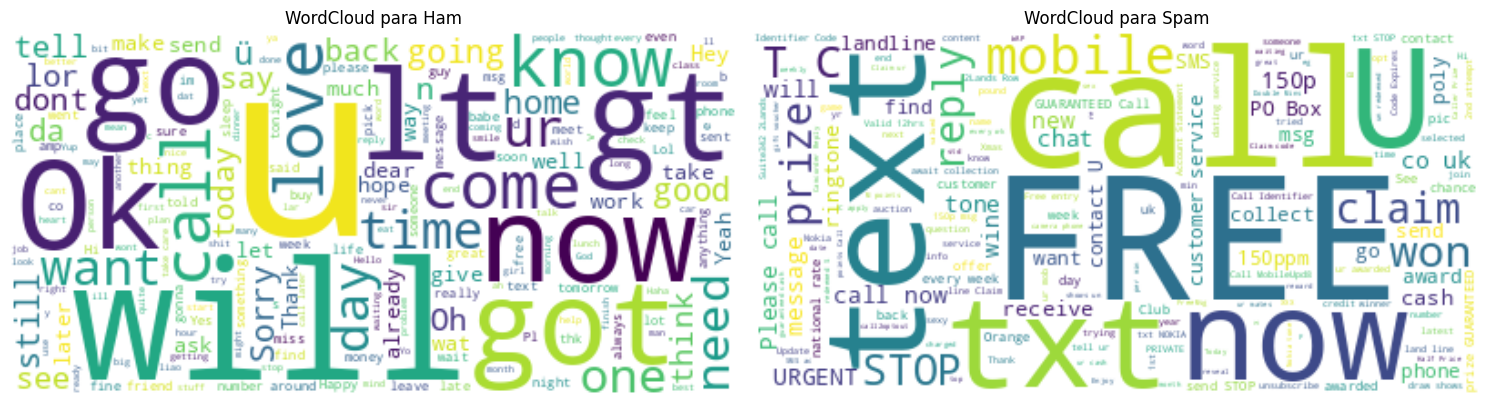

In [ ]:
print('Distribución de Labels')
print(data.groupby('label').count()['raw_text'])

avg_length = data['length'].mean()
min_length = data['length'].min()
max_length = data['length'].max()

print(f'Largo promedio: {avg_length}')
print(f'Largo mínimo: {min_length}')
print(f'Largo máximo: {max_length}')
print('\n\n')

grouped_text = data.groupby('label')['raw_text'].agg(' '.join)

ham_words = grouped_text['ham']
spam_words = grouped_text['spam']

# Armamos wordclouds para cada grupo de palabras
wordcloud1 = WordCloud(background_color="white").generate(ham_words)
wordcloud2 = WordCloud(background_color="white").generate(spam_words)

# Configuración de la figura de matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
# Texto para Ham
ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis("off")
ax1.set_title("WordCloud para Ham")
# Texto para Spam
ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis("off")
ax2.set_title("WordCloud para Spam")
# Plot
plt.tight_layout()
plt.show()


# 2 - Vectorizacion con BOW y TF-IDF

## 2.1 - Vectorización con CountVectorizer

[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) genera representaciones esparsas del tipo Bag of Words.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciamos el Vectorizador
vectorizer = CountVectorizer()

# Fit y transform
X = vectorizer.fit_transform(data['raw_text'])

# El resultado es un sparse array de scipy. Hacemos esto para poder observarlo
X_array = X.toarray()

print(f"Dimensionalidad: {X_array.shape}")

# To see the feature names (words corresponding to columns of X_array):
feature_names = vectorizer.get_feature_names_out()

print(feature_names)



Dimensionalidad: (5574, 8713)
['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


Vemos las dimensiones no 0 de un ejemplo

In [ ]:
i = 5 #@param
print(f"Ejemplo para: {data.iloc[i]['raw_text']} - {data.iloc[i]['label']}")
print(np.where(X_array[i] != 0))

Ejemplo para: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv - spam
(array([ 616, 1097, 1363, 1475, 2015, 2455, 3323, 3380, 3438, 3866, 4245,
       4642, 5400, 5453, 5538, 6297, 6771, 7089, 7279, 7302, 7578, 7694,
       7806, 8086, 8371, 8539, 8614, 8668]),)


## 2.2 - Vectorización con TfidfVectorizer

[TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) genera representaciones usando TfIdf. Es lo mismo que aplicar CountVectorizer y luego una transformación de TfIdf.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Instanciamos el Vectorizador
vectorizer = TfidfVectorizer()

# Fit y transform
X = vectorizer.fit_transform(data['raw_text'])

# El resultado es un sparse array de scipy. Hacemos esto para poder observarlo
X_array = X.toarray()

print(f"Dimensionalidad: {X_array.shape}")

# To see the feature names (words corresponding to columns of X_array):
feature_names = vectorizer.get_feature_names_out()

Dimensionalidad: (5574, 8713)


In [ ]:
i = 5 #@param
print(f"Ejemplo para: {data.iloc[i]['raw_text']} - {data.iloc[i]['label']}")
print(np.where(X_array[i] != 0))

Ejemplo para: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv - spam
(array([ 616, 1097, 1363, 1475, 2015, 2455, 3323, 3380, 3438, 3866, 4245,
       4642, 5400, 5453, 5538, 6297, 6771, 7089, 7279, 7302, 7578, 7694,
       7806, 8086, 8371, 8539, 8614, 8668]),)


In [ ]:
X_array[i][616]

0.18959188929300888

# 3 - Word Embeddings

Para usar embeddings preentrenados de Word2Vec usamos la librería [gensim](https://radimrehurek.com/gensim/).

Para crear su propio modelo de Word2Vec se puede seguir [esta documentación](https://radimrehurek.com/gensim/models/word2vec.html).

Otros recursos valiosos para [trabajar con Gensim](https://github.com/RaRe-Technologies/gensim-data).

Creamos una función para convertir el texto en vectores de promedios de embeddings.

In [ ]:
def sentence_to_avg_vector(sentence, model, num_features):
    words = sentence.split()
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0

    for word in words:
        if word in model:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])

    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec

## 3.1 Word2Vec

Vamos a entrenar un modelo con nuestros datos locales. Para descargar un modelo preentrenado en muchos datos se puede pullear [este modelo](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g).

In [ ]:
from gensim.models import Word2Vec

sentences = [sent.split() for sent in data['raw_text'].values.tolist()]
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=0, epochs=20)

Nos quedamos con los vectores de embeddings.

In [ ]:
word2vec_vectors = model.wv

In [ ]:
sample_sentence = data.iloc[0]['raw_text'].lower()  # Los vectores son Case Sensitive, pasar a minúscula
vector = sentence_to_avg_vector(sample_sentence, word2vec_vectors, 50)
print(vector)

[ 0.13685367  0.0024255   0.3945579   0.24572416 -0.34055254 -0.42479262
  0.6562718   0.94799316 -0.91799223 -0.5491797   0.05094632 -0.76258683
  0.2619793   0.32389036 -0.26356763  0.01106323  0.8821759   0.26892212
 -0.79436135 -0.28809255  0.4547696   0.24481913  0.6308483   0.02875196
  0.1751801   0.6199711  -0.41443142  0.1428669  -0.24770935  0.21315446
 -0.05369326 -0.3134585  -0.2110889  -0.41823688 -0.36756602  0.6655824
  0.23451519  0.0573693   0.09372725 -0.26643887  0.7769657  -0.3915816
 -0.29931766  0.1843063   0.91183245 -0.16935743  0.2616817  -0.72970283
  0.04827635  0.09025441]


## 3.2 - GloVe

Para esta sección usaremos embeddings [preentrenados de GloVe](https://nlp.stanford.edu/projects/glove/).

Usaremos los embeddinsg de 6K millones de palabras, entrenados sobre Wikipedia y Gigaword.

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-09-07 15:53:21--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-07 15:53:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-09-07 15:56:00 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

Importamos las librerían necesarias, transformamos el formato de los vectores y los cargamos en memoria.

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

def load_glove_vectors(glove_input_file, word2vec_output_file):
    glove2word2vec(glove_input_file, word2vec_output_file)
    return KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

glove_input_file = 'glove.6B.50d.txt'  # <-- Archivo de vectores GloVe
word2vec_output_file = 'glove.6B.50d_word2vec.txt'  # <-- Archivo de salida en formato word2vec
glove_model = load_glove_vectors(glove_input_file, word2vec_output_file)

<ipython-input-18-ba9ddb32b3db>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [ ]:
print(data.iloc[0]['raw_text'].lower())
sample_sentence = data.iloc[0]['raw_text'].lower()  # Los vectores son Case Sensitive, pasar a minúscula
vector = sentence_to_avg_vector(sample_sentence, glove_model, 50)
print(vector)

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
[ 0.2330169   0.32740942 -0.06636206  0.12893374  0.05068294 -0.36408445
 -0.20249876 -0.1949838  -0.08273356  0.13165134  0.03575626  0.1478645
 -0.17955124 -0.2586081   0.13626695 -0.15625814  0.04811274  0.16585355
 -0.45787963 -0.09630225  0.01181518 -0.02583143  0.35563374  0.32379663
  0.01569281 -0.8271391  -0.44171953  0.00948418  0.08774631 -0.34379762
  2.3944306   0.17804405 -0.17862642  0.08448969  0.077613   -0.2826482
  0.1890055   0.02165294  0.079725   -0.01463632  0.14698449 -0.08806801
  0.0699635  -0.12110001 -0.25518662  0.13653812 -0.06652069 -0.38124484
  0.2139856   0.19598256]


# 4 - Aprendizaje Automático para PLN

Seguimos el pipeline Preprocesamiento -> Vectorización -> Entrenamiento

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
class Preprocess(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [text.lower() for text in X]

Obtenemos los datos

In [ ]:
labels, uniques = pd.factorize(data['label'])
texts = data['raw_text'].values.tolist()

Instanciamos el preprocesamiento

In [ ]:
preproc = Preprocess()
X = preproc.fit_transform(texts)

In [ ]:
X[:10]

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had you

Instanciar el vectorizador.

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
X[:10]

<10x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 171 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 98.13%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1203
           1       0.99      0.87      0.93       191

    accuracy                           0.98      1394
   macro avg       0.98      0.94      0.96      1394
weighted avg       0.98      0.98      0.98      1394



# 5 - Práctico:

Armar un pipeline para esta misma tarea que no sea el ya dado en el punto 4.

Probar algunos ejemplos y ver cómo varian los resultados usando distintas vectorizaciones o modelos.

In [ ]:
from sklearn.svm import SVC